### IS727272 - Cordero Hernández, Marco Ricardo

# DT_3 Multiclass Classification using Decision Trees

Instrucciones:

1. Para este ejercicio utilizarán el dataset en: https://archive.ics.uci.edu/ml/datasets/balance+scale, que es un dataset con una salida de 3 clases: L, R, B.
2. Del siguiente link, realizar la práctica: https://adityagoel123.medium.com/multi-class-classification-using-decision-tree-model-68e75114303
3. Obtener la matriz de Confusión para los datos de entrenamiento y los datos de testing
4. Realiza la misma práctica utilizando los datos del dataset de dígitos que utilizamos para el perceptron multiclase (https://www.kaggle.com/competitions/digit-recognizer/data)

## Part 1: Balance Scale DT

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn import tree

In [2]:
balance_data = pd.read_csv('./Datasets/balance-scale.data', header = None)
balance_data.head()

,0,1,2,3,4
0,B,1,1,1,1
1,R,1,1,1,2
2,R,1,1,1,3
3,R,1,1,1,4
4,R,1,1,1,5


In [3]:
X = balance_data.values[:, 1:5]
Y = balance_data.values[:, 0]

np.unique(Y, return_counts = True)

(array(['B', 'L', 'R'], dtype=object), array([ 49, 288, 288], dtype=int64))

In [4]:
# Testing dataset := 30% ∴ Training := 70%
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size = 0.3, random_state = 100)

print(f'{X_train.shape=}\t{X_test.shape=}\n{y_train.shape=}\t{y_test.shape=}')

X_train.shape=(437, 4)	X_test.shape=(188, 4)
y_train.shape=(437,)	y_test.shape=(188,)


In [5]:
# Gini model
clf_gini = DecisionTreeClassifier(criterion = 'gini', random_state = 100, max_depth = 3, min_samples_leaf = 5)
clf_gini = clf_gini.fit(X_train, y_train)
print(clf_gini)

DecisionTreeClassifier(max_depth=3, min_samples_leaf=5, random_state=100)


In [6]:
# Entropy model
clf_entropy = DecisionTreeClassifier(criterion = 'entropy', random_state = 100, max_depth = 3, min_samples_leaf = 5)
clf_entropy = clf_entropy.fit(X_train, y_train)
print(clf_entropy)

DecisionTreeClassifier(criterion='entropy', max_depth=3, min_samples_leaf=5,
                       random_state=100)


In [7]:
# Predictions
y_pred_gini = clf_gini.predict(X_test)
y_pred_entropy = clf_entropy.predict(X_test)

In [8]:
# Model evaluation
from sklearn import metrics
from sklearn.metrics import classification_report, confusion_matrix

print(classification_report(y_test, y_pred_gini), '\n')
print(classification_report(y_test, y_pred_entropy))

              precision    recall  f1-score   support

           B       0.00      0.00      0.00        13
           L       0.73      0.79      0.76        85
           R       0.74      0.79      0.76        90

    accuracy                           0.73       188
   macro avg       0.49      0.53      0.51       188
weighted avg       0.68      0.73      0.71       188
 

              precision    recall  f1-score   support

           B       0.00      0.00      0.00        13
           L       0.71      0.74      0.72        85
           R       0.71      0.78      0.74        90

    accuracy                           0.71       188
   macro avg       0.47      0.51      0.49       188
weighted avg       0.66      0.71      0.68       188



C:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\metr

In [9]:
y_pred_entropy

array(['R', 'L', 'R', 'L', 'R', 'L', 'R', 'L', 'R', 'R', 'R', 'R', 'L',
       'L', 'R', 'L', 'R', 'L', 'L', 'R', 'L', 'R', 'L', 'L', 'R', 'L',
       'R', 'L', 'R', 'L', 'R', 'L', 'R', 'L', 'L', 'L', 'L', 'L', 'R',
       'L', 'R', 'L', 'R', 'L', 'R', 'R', 'L', 'L', 'R', 'L', 'L', 'R',
       'L', 'L', 'R', 'L', 'R', 'R', 'L', 'R', 'R', 'R', 'L', 'L', 'R',
       'L', 'L', 'R', 'L', 'L', 'L', 'R', 'R', 'L', 'R', 'L', 'R', 'R',
       'R', 'L', 'R', 'L', 'L', 'L', 'L', 'R', 'R', 'L', 'R', 'L', 'R',
       'R', 'L', 'L', 'L', 'R', 'R', 'L', 'L', 'L', 'R', 'L', 'L', 'R',
       'R', 'R', 'R', 'R', 'R', 'L', 'R', 'L', 'R', 'R', 'L', 'R', 'R',
       'L', 'R', 'R', 'L', 'R', 'R', 'R', 'L', 'L', 'L', 'L', 'L', 'R',
       'R', 'R', 'R', 'L', 'R', 'R', 'R', 'L', 'L', 'R', 'L', 'R', 'L',
       'R', 'L', 'R', 'R', 'L', 'L', 'R', 'L', 'R', 'R', 'R', 'R', 'R',
       'L', 'R', 'R', 'R', 'R', 'R', 'R', 'L', 'R', 'L', 'R', 'R', 'L',
       'R', 'L', 'R', 'L', 'R', 'L', 'L', 'L', 'L', 'L', 'R', 'R

In [10]:
y_pred_gini

array(['R', 'L', 'R', 'R', 'R', 'L', 'R', 'L', 'L', 'L', 'R', 'L', 'L',
       'L', 'R', 'L', 'R', 'L', 'L', 'R', 'L', 'R', 'L', 'L', 'R', 'L',
       'L', 'L', 'R', 'L', 'L', 'L', 'R', 'L', 'L', 'L', 'L', 'R', 'L',
       'L', 'R', 'L', 'R', 'L', 'R', 'R', 'L', 'L', 'R', 'L', 'R', 'R',
       'L', 'R', 'R', 'L', 'R', 'R', 'L', 'L', 'R', 'R', 'L', 'L', 'L',
       'L', 'L', 'R', 'R', 'L', 'L', 'R', 'R', 'L', 'R', 'L', 'R', 'R',
       'R', 'L', 'R', 'L', 'L', 'L', 'L', 'R', 'R', 'L', 'R', 'L', 'R',
       'R', 'L', 'L', 'L', 'R', 'R', 'L', 'L', 'L', 'R', 'L', 'R', 'R',
       'R', 'R', 'R', 'R', 'R', 'L', 'R', 'L', 'R', 'R', 'L', 'R', 'R',
       'R', 'R', 'R', 'L', 'R', 'L', 'L', 'L', 'L', 'L', 'L', 'L', 'R',
       'R', 'R', 'R', 'L', 'R', 'R', 'R', 'L', 'L', 'R', 'L', 'R', 'L',
       'R', 'L', 'L', 'R', 'L', 'L', 'R', 'L', 'R', 'L', 'R', 'R', 'R',
       'L', 'R', 'R', 'R', 'R', 'R', 'L', 'L', 'R', 'R', 'R', 'R', 'L',
       'R', 'R', 'R', 'L', 'R', 'L', 'L', 'L', 'L', 'R', 'R', 'L

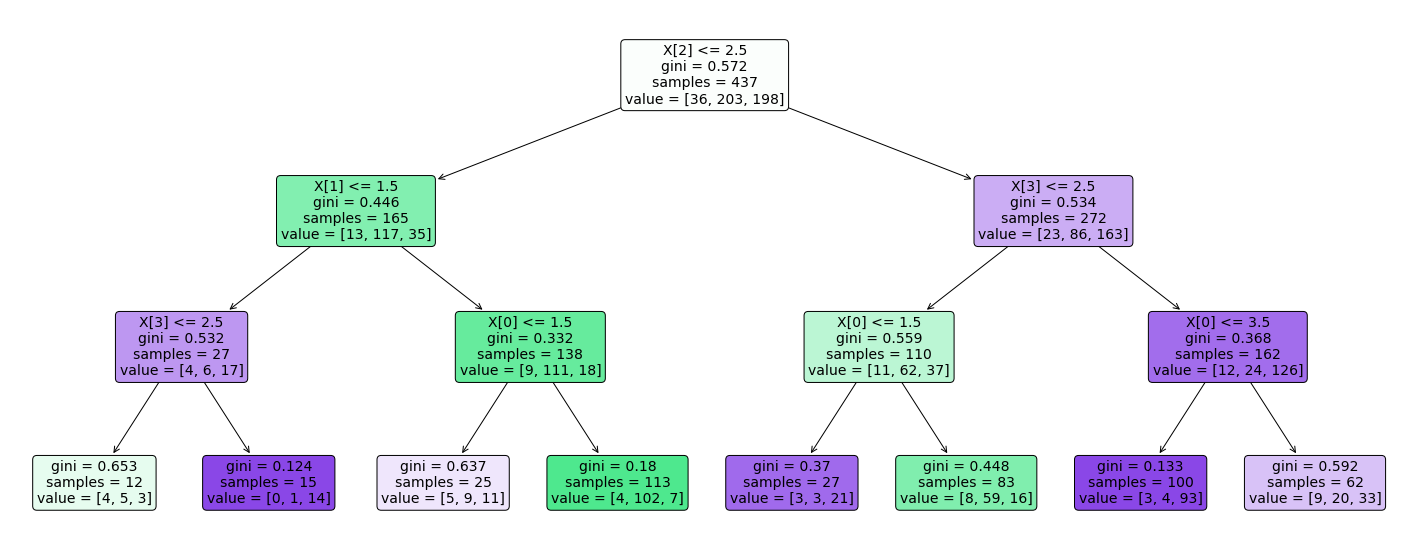

In [11]:
# Tree ploting
plt.figure(figsize = (25, 10))
a = tree.plot_tree(clf_gini, filled = True, rounded = True, fontsize = 14)

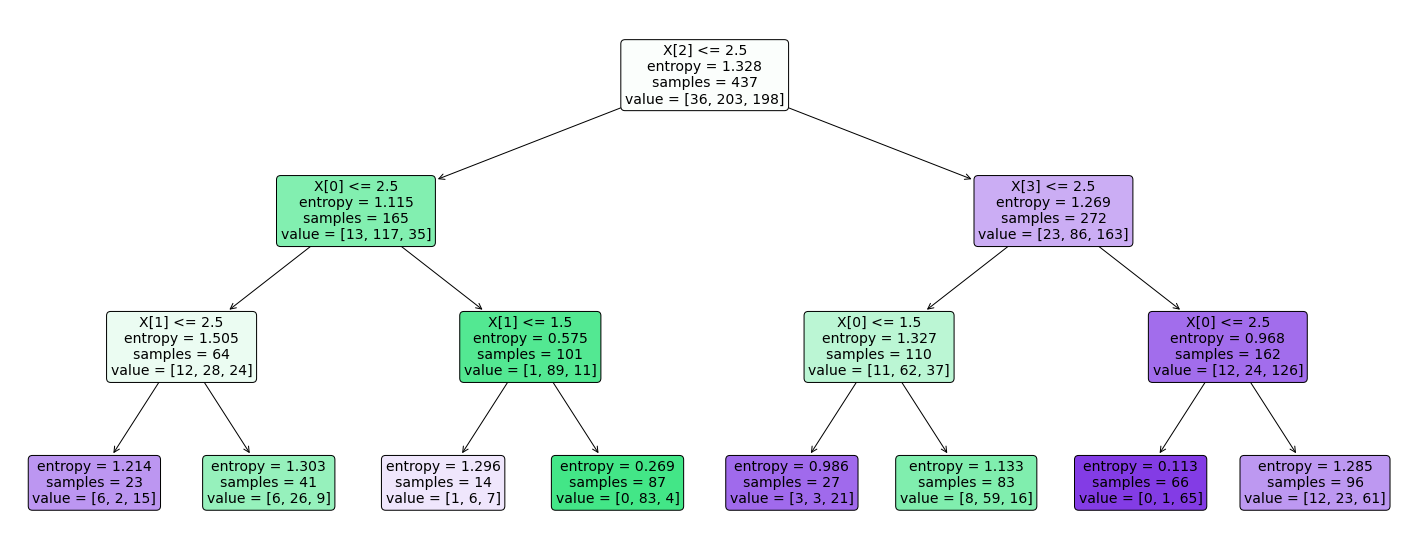

In [12]:
plt.figure(figsize = (25, 10))
a = tree.plot_tree(clf_entropy, filled = True, rounded = True, fontsize = 14)

### Confussion Matrix (Train and Test)

In [13]:
from sklearn.metrics import confusion_matrix

print('Train matrices')

cfm_train_gini = confusion_matrix(y_test, y_pred_gini)
print(cfm_train_gini, '\n')

cfm_train_entropy = confusion_matrix(y_test, y_pred_entropy)
print(cfm_train_entropy)

Train matrices
[[ 0  6  7]
 [ 0 67 18]
 [ 0 19 71]] 

[[ 0  6  7]
 [ 0 63 22]
 [ 0 20 70]]


In [14]:
print('Test matrices')

# Gini model
clf_gini = DecisionTreeClassifier(criterion = 'gini', random_state = 100, max_depth = 3, min_samples_leaf = 5)
clf_gini = clf_gini.fit(X_test, y_test)

# Entropy model
clf_entropy = DecisionTreeClassifier(criterion = 'entropy', random_state = 100, max_depth = 3, min_samples_leaf = 5)
clf_entropy = clf_entropy.fit(X_test, y_test)

# Predictions
y_pred_gini = clf_gini.predict(X_test)
y_pred_entropy = clf_entropy.predict(X_test)

cfm_train_gini = confusion_matrix(y_test, y_pred_gini)
print(cfm_train_gini, '\n')

cfm_train_entropy = confusion_matrix(y_test, y_pred_entropy)
print(cfm_train_entropy)

Test matrices
[[ 0  4  9]
 [ 0 67 18]
 [ 0  3 87]] 

[[ 0  4  9]
 [ 0 73 12]
 [ 0 11 79]]


## Part 2: Digits

In [15]:
digits_data = pd.read_csv('./Datasets/digits.csv')
digits_data.head()

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [16]:
X = balance_data.values[:, 1:]
Y = balance_data.values[:, 0]

print(f'{X.shape=}\n{Y.shape=}')

X.shape=(625, 4)
Y.shape=(625,)


In [17]:
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size = 0.3, random_state = 100)
print(f'{X_train.shape=}\t{X_test.shape=}\n{y_train.shape=}\t{y_test.shape=}')

X_train.shape=(437, 4)	X_test.shape=(188, 4)
y_train.shape=(437,)	y_test.shape=(188,)


In [18]:
# Gini model
clf_gini = DecisionTreeClassifier(criterion = 'gini', random_state = 100, max_depth = 3, min_samples_leaf = 5)
clf_gini = clf_gini.fit(X_train, y_train)
print(clf_gini)

# Entropy model
clf_entropy = DecisionTreeClassifier(criterion = 'entropy', random_state = 100, max_depth = 3, min_samples_leaf = 5)
clf_entropy = clf_entropy.fit(X_train, y_train)
print(clf_entropy)

DecisionTreeClassifier(max_depth=3, min_samples_leaf=5, random_state=100)
DecisionTreeClassifier(criterion='entropy', max_depth=3, min_samples_leaf=5,
                       random_state=100)


In [19]:
# Predictions
y_pred_gini = clf_gini.predict(X_test)
y_pred_entropy = clf_entropy.predict(X_test)

In [20]:
print(classification_report(y_test, y_pred_gini), '\n')
print(classification_report(y_test, y_pred_entropy))

              precision    recall  f1-score   support

           B       0.00      0.00      0.00        13
           L       0.73      0.79      0.76        85
           R       0.74      0.79      0.76        90

    accuracy                           0.73       188
   macro avg       0.49      0.53      0.51       188
weighted avg       0.68      0.73      0.71       188
 

              precision    recall  f1-score   support

           B       0.00      0.00      0.00        13
           L       0.71      0.74      0.72        85
           R       0.71      0.78      0.74        90

    accuracy                           0.71       188
   macro avg       0.47      0.51      0.49       188
weighted avg       0.66      0.71      0.68       188



C:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\metr

In [21]:
y_pred_entropy

array(['R', 'L', 'R', 'L', 'R', 'L', 'R', 'L', 'R', 'R', 'R', 'R', 'L',
       'L', 'R', 'L', 'R', 'L', 'L', 'R', 'L', 'R', 'L', 'L', 'R', 'L',
       'R', 'L', 'R', 'L', 'R', 'L', 'R', 'L', 'L', 'L', 'L', 'L', 'R',
       'L', 'R', 'L', 'R', 'L', 'R', 'R', 'L', 'L', 'R', 'L', 'L', 'R',
       'L', 'L', 'R', 'L', 'R', 'R', 'L', 'R', 'R', 'R', 'L', 'L', 'R',
       'L', 'L', 'R', 'L', 'L', 'L', 'R', 'R', 'L', 'R', 'L', 'R', 'R',
       'R', 'L', 'R', 'L', 'L', 'L', 'L', 'R', 'R', 'L', 'R', 'L', 'R',
       'R', 'L', 'L', 'L', 'R', 'R', 'L', 'L', 'L', 'R', 'L', 'L', 'R',
       'R', 'R', 'R', 'R', 'R', 'L', 'R', 'L', 'R', 'R', 'L', 'R', 'R',
       'L', 'R', 'R', 'L', 'R', 'R', 'R', 'L', 'L', 'L', 'L', 'L', 'R',
       'R', 'R', 'R', 'L', 'R', 'R', 'R', 'L', 'L', 'R', 'L', 'R', 'L',
       'R', 'L', 'R', 'R', 'L', 'L', 'R', 'L', 'R', 'R', 'R', 'R', 'R',
       'L', 'R', 'R', 'R', 'R', 'R', 'R', 'L', 'R', 'L', 'R', 'R', 'L',
       'R', 'L', 'R', 'L', 'R', 'L', 'L', 'L', 'L', 'L', 'R', 'R

In [22]:
y_pred_gini

array(['R', 'L', 'R', 'R', 'R', 'L', 'R', 'L', 'L', 'L', 'R', 'L', 'L',
       'L', 'R', 'L', 'R', 'L', 'L', 'R', 'L', 'R', 'L', 'L', 'R', 'L',
       'L', 'L', 'R', 'L', 'L', 'L', 'R', 'L', 'L', 'L', 'L', 'R', 'L',
       'L', 'R', 'L', 'R', 'L', 'R', 'R', 'L', 'L', 'R', 'L', 'R', 'R',
       'L', 'R', 'R', 'L', 'R', 'R', 'L', 'L', 'R', 'R', 'L', 'L', 'L',
       'L', 'L', 'R', 'R', 'L', 'L', 'R', 'R', 'L', 'R', 'L', 'R', 'R',
       'R', 'L', 'R', 'L', 'L', 'L', 'L', 'R', 'R', 'L', 'R', 'L', 'R',
       'R', 'L', 'L', 'L', 'R', 'R', 'L', 'L', 'L', 'R', 'L', 'R', 'R',
       'R', 'R', 'R', 'R', 'R', 'L', 'R', 'L', 'R', 'R', 'L', 'R', 'R',
       'R', 'R', 'R', 'L', 'R', 'L', 'L', 'L', 'L', 'L', 'L', 'L', 'R',
       'R', 'R', 'R', 'L', 'R', 'R', 'R', 'L', 'L', 'R', 'L', 'R', 'L',
       'R', 'L', 'L', 'R', 'L', 'L', 'R', 'L', 'R', 'L', 'R', 'R', 'R',
       'L', 'R', 'R', 'R', 'R', 'R', 'L', 'L', 'R', 'R', 'R', 'R', 'L',
       'R', 'R', 'R', 'L', 'R', 'L', 'L', 'L', 'L', 'R', 'R', 'L

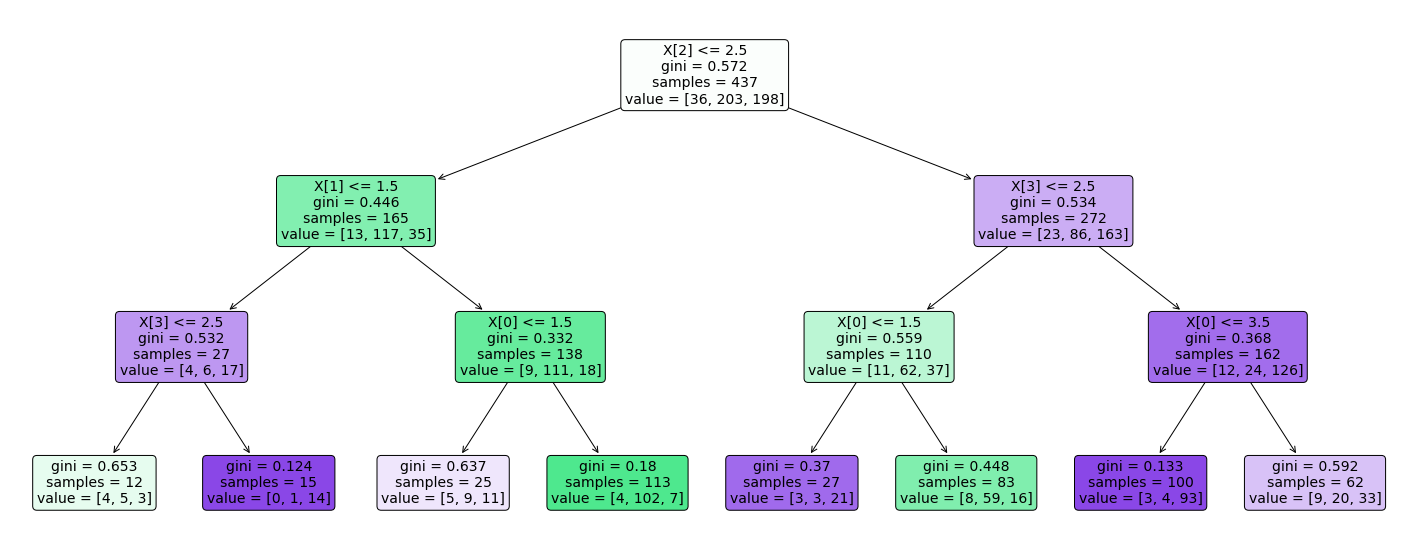

In [23]:
# Tree ploting
plt.figure(figsize = (25, 10))
a = tree.plot_tree(clf_gini, filled = True, rounded = True, fontsize = 14)

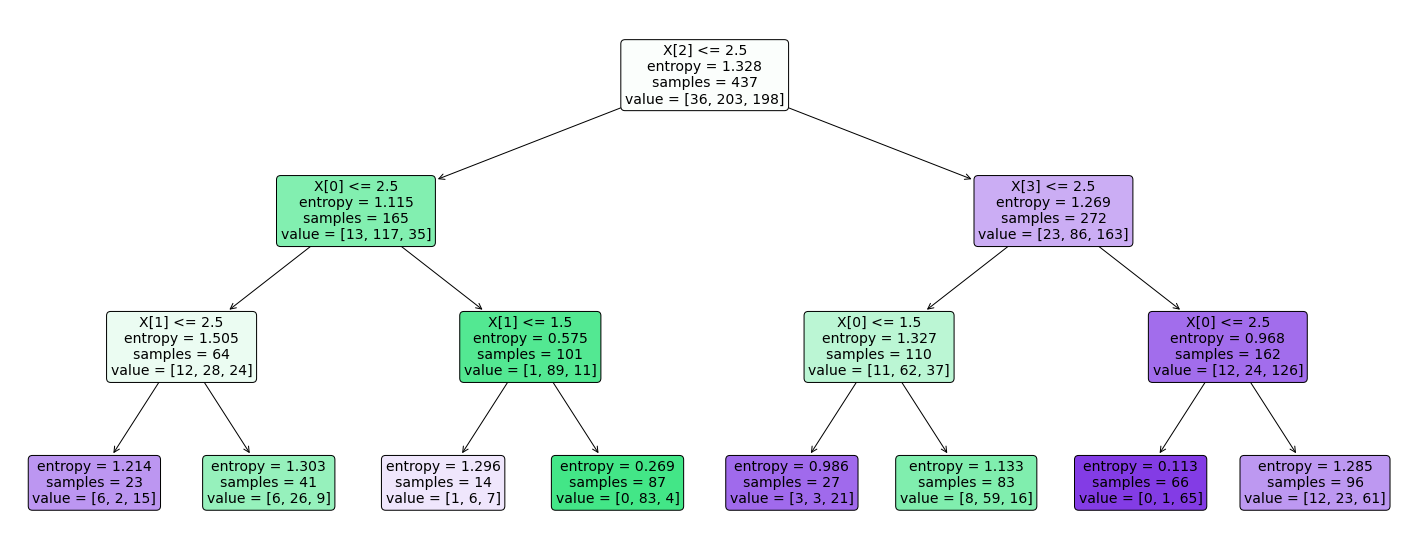

In [24]:
plt.figure(figsize = (25, 10))
a = tree.plot_tree(clf_entropy, filled = True, rounded = True, fontsize = 14)